In [1]:
# Reference: https://towardsdatascience.com/using-lstms-to-forecast-time-series-4ab688386b1f

# Dataset: https://data.gov.sg/dataset/coe-bidding-results

In [1]:
import pandas as pd

# parse dates and set the date column as index
df = pd.read_csv('../data/coe-bidding-results/coe-results-prevailing-quota-premium.csv',
                 parse_dates=True, index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 392 entries, 2010-02-01 to 2018-03-01
Data columns (total 2 columns):
vehicle_class    392 non-null object
pqp              392 non-null int64
dtypes: int64(1), object(1)
memory usage: 9.2+ KB


In [2]:
# filter to category A

# loc[row selector, col selector]
# col selector optional for all cols
dfA = df.loc[df.vehicle_class == 'Category A'] 

dfA.plot()

In [3]:
dfA.pqp.values

array([18266, 19331, 21421, 25587, 27781, 29843, 30120, 31388, 31643,
       31624, 33607, 38714, 40958, 42145, 40925, 42292, 44234, 47105,
       51234, 52288, 51517, 50585, 52716, 53280, 51380, 51202, 52979,
       57596, 59393, 60219, 61115, 64413, 66578, 68566, 70916, 75818,
       83003, 84822, 81237, 71306, 65044, 64762, 68689, 72679, 76654,
       79121, 78424, 76109, 73237, 73431, 74838, 75517, 71672, 66586,
       62610, 63380, 63672, 64171, 64584, 65607, 66130, 63865, 62721,
       63444, 66107, 66255, 62795, 59216, 56798, 56583, 56832, 56633,
       53799, 49541, 46077, 45578, 46454, 49519, 51518, 53339, 52108,
       51641, 51271, 50645, 50394, 49429, 50230, 50665, 50625, 48200,
       45400, 44081, 42564, 41994, 42698, 42970, 42122, 39274],
      dtype=int64)

In [4]:
# conda install statsmodels

from statsmodels.tsa.stattools import adfuller

def get_ADF(values):
    result = adfuller(values)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

X = dfA.pqp.values
get_ADF(X) # p-value > 0.05 => non-stationary

ADF Statistic: -1.696998
p-value: 0.432660
Critical Values:
	1%: -3.506
	5%: -2.895
	10%: -2.584


ADF Statistic: -1.262586
p-value: 0.646111
Critical Values:
	1%: -3.505
	5%: -2.894
	10%: -2.584


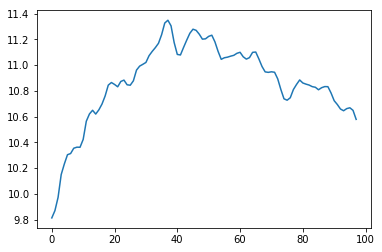

In [5]:
import numpy as np
import matplotlib.pyplot as plt

Z = np.log(X)
plt.plot(Z)
get_ADF(Z) # log is less stationary than original

In [6]:
dfA.pqp.diff()

month
2010-02-01       NaN
2010-03-01    1065.0
2010-04-01    2090.0
2010-05-01    4166.0
2010-06-01    2194.0
2010-07-01    2062.0
2010-08-01     277.0
2010-09-01    1268.0
2010-10-01     255.0
2010-11-01     -19.0
2010-12-01    1983.0
2011-01-01    5107.0
2011-02-01    2244.0
2011-03-01    1187.0
2011-04-01   -1220.0
2011-05-01    1367.0
2011-06-01    1942.0
2011-07-01    2871.0
2011-08-01    4129.0
2011-09-01    1054.0
2011-10-01    -771.0
2011-11-01    -932.0
2011-12-01    2131.0
2012-01-01     564.0
2012-02-01   -1900.0
2012-03-01    -178.0
2012-04-01    1777.0
2012-05-01    4617.0
2012-06-01    1797.0
2012-07-01     826.0
               ...  
2015-10-01   -2418.0
2015-11-01    -215.0
2015-12-01     249.0
2016-01-01    -199.0
2016-02-01   -2834.0
2016-03-01   -4258.0
2016-04-01   -3464.0
2016-05-01    -499.0
2016-06-01     876.0
2016-07-01    3065.0
2016-08-01    1999.0
2016-09-01    1821.0
2016-10-01   -1231.0
2016-11-01    -467.0
2016-12-01    -370.0
2017-01-01    -626.0
2017-02

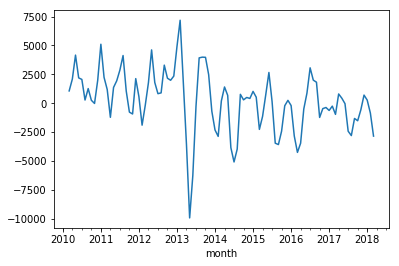

In [7]:
# first order difference
Z = dfA.pqp.diff()
Z.plot()

In [8]:
get_ADF(Z.dropna()) # stationarity improved because p-value is 13%

ADF Statistic: -2.439660
p-value: 0.130854
Critical Values:
	1%: -3.506
	5%: -2.895
	10%: -2.584


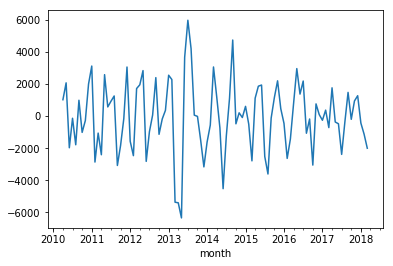

In [9]:
# 2nd order difference
ZZ = pd.Series(Z).diff()
ZZ.plot()

In [10]:
get_ADF(ZZ.dropna()) # 2nd order difference: stationary

ADF Statistic: -5.575863
p-value: 0.000001
Critical Values:
	1%: -3.511
	5%: -2.897
	10%: -2.585


In [11]:
# Our dataset - first order difference
Z.values

array([   nan,  1065.,  2090.,  4166.,  2194.,  2062.,   277.,  1268.,
         255.,   -19.,  1983.,  5107.,  2244.,  1187., -1220.,  1367.,
        1942.,  2871.,  4129.,  1054.,  -771.,  -932.,  2131.,   564.,
       -1900.,  -178.,  1777.,  4617.,  1797.,   826.,   896.,  3298.,
        2165.,  1988.,  2350.,  4902.,  7185.,  1819., -3585., -9931.,
       -6262.,  -282.,  3927.,  3990.,  3975.,  2467.,  -697., -2315.,
       -2872.,   194.,  1407.,   679., -3845., -5086., -3976.,   770.,
         292.,   499.,   413.,  1023.,   523., -2265., -1144.,   723.,
        2663.,   148., -3460., -3579., -2418.,  -215.,   249.,  -199.,
       -2834., -4258., -3464.,  -499.,   876.,  3065.,  1999.,  1821.,
       -1231.,  -467.,  -370.,  -626.,  -251.,  -965.,   801.,   435.,
         -40., -2425., -2800., -1319., -1517.,  -570.,   704.,   272.,
        -848., -2848.])

In [12]:
# 1. Create windows
# 2. train-test-split. No shuffle
# 3. scale between -1 and 1 because of RNN/tanh
# 4. fit a regressor


In [13]:
# 1. Create window size of 12

window_size = 12

# examples of shift:
# print(Z.shift(-1).values.flatten()) # shift left by 1
# print(Z.shift(-2).values.flatten()) # shift left by 2

Z.dropna(inplace=True) # drop the first NaN value

series = pd.DataFrame(Z.values)
series_s = series.copy()
for i in range(window_size):
    series = pd.concat([series, series_s.shift(-(i+1))], axis=1)
    print('concating', series.head())
series

concating         0       0
0  1065.0  2090.0
1  2090.0  4166.0
2  4166.0  2194.0
3  2194.0  2062.0
4  2062.0   277.0
concating         0       0       0
0  1065.0  2090.0  4166.0
1  2090.0  4166.0  2194.0
2  4166.0  2194.0  2062.0
3  2194.0  2062.0   277.0
4  2062.0   277.0  1268.0
concating         0       0       0       0
0  1065.0  2090.0  4166.0  2194.0
1  2090.0  4166.0  2194.0  2062.0
2  4166.0  2194.0  2062.0   277.0
3  2194.0  2062.0   277.0  1268.0
4  2062.0   277.0  1268.0   255.0
concating         0       0       0       0       0
0  1065.0  2090.0  4166.0  2194.0  2062.0
1  2090.0  4166.0  2194.0  2062.0   277.0
2  4166.0  2194.0  2062.0   277.0  1268.0
3  2194.0  2062.0   277.0  1268.0   255.0
4  2062.0   277.0  1268.0   255.0   -19.0
concating         0       0       0       0       0       0
0  1065.0  2090.0  4166.0  2194.0  2062.0   277.0
1  2090.0  4166.0  2194.0  2062.0   277.0  1268.0
2  4166.0  2194.0  2062.0   277.0  1268.0   255.0
3  2194.0  2062.0   277.0  126

,0,0,0,0,0,0,0,0,0,0,0,0,0
0,1065.0,2090.0,4166.0,2194.0,2062.0,277.0,1268.0,255.0,-19.0,1983.0,5107.0,2244.0,1187.0
1,2090.0,4166.0,2194.0,2062.0,277.0,1268.0,255.0,-19.0,1983.0,5107.0,2244.0,1187.0,-1220.0
2,4166.0,2194.0,2062.0,277.0,1268.0,255.0,-19.0,1983.0,5107.0,2244.0,1187.0,-1220.0,1367.0
3,2194.0,2062.0,277.0,1268.0,255.0,-19.0,1983.0,5107.0,2244.0,1187.0,-1220.0,1367.0,1942.0
4,2062.0,277.0,1268.0,255.0,-19.0,1983.0,5107.0,2244.0,1187.0,-1220.0,1367.0,1942.0,2871.0
5,277.0,1268.0,255.0,-19.0,1983.0,5107.0,2244.0,1187.0,-1220.0,1367.0,1942.0,2871.0,4129.0
6,1268.0,255.0,-19.0,1983.0,5107.0,2244.0,1187.0,-1220.0,1367.0,1942.0,2871.0,4129.0,1054.0
7,255.0,-19.0,1983.0,5107.0,2244.0,1187.0,-1220.0,1367.0,1942.0,2871.0,4129.0,1054.0,-771.0
8,-19.0,1983.0,5107.0,2244.0,1187.0,-1220.0,1367.0,1942.0,2871.0,4129.0,1054.0,-771.0,-932.0
9,1983.0,5107.0,2244.0,1187.0,-1220.0,1367.0,1942.0,2871.0,4129.0,1054.0,-771.0,-932.0,2131.0


In [14]:
# use the non NaN rows for training
data = series.dropna()

# save the NaN rows for later prediction
test_data = series.iloc[84:]

In [15]:
# Create X and y from training data
y = data.iloc[:, -1] # truth is last column
X = data.iloc[:, :-1] # features
print(X.shape)
print(y.shape)

(85, 12)
(85,)


In [16]:
# Train-test-split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)

In [17]:
# Scaling
# Pick either (0, 1) or (-1, 1) convention
# StandardScaler also works
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

y_scaler = MinMaxScaler(feature_range=(-1, 1))
y_train_sc = y_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_sc = y_scaler.transform(y_test.values.reshape(-1, 1))

In [18]:
# LSTM shapes:
#
# Option 1: 12 features, window size 1
#
# Option 2: 1 feature, window size 12
#

In [19]:
# Option 1
# 
# units = 24
# window_size = 1
# features 12
#
# forget gate:
#   f = sigma(np.dot(Wf, [24 + 12]) + 24
#   Wf: 36 * 24
#   bf: 24
#
# input gate: Wi, bi
#   i = sigmoid
#
# Cell state: Wc, bc
# Output gate: Wo, bo
4*(36*24+24)

3552

In [20]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model1 = Sequential()
num_features = 12

# timesteps, features
model1.add(LSTM(input_shape=(1, num_features), 
                units=window_size*2))
model1.add(Dense(1)) # output with no activation (regression)
model1.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 24)                3552      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 3,577
Trainable params: 3,577
Non-trainable params: 0
_________________________________________________________________


In [21]:
from keras.callbacks import TensorBoard
import time
tensorboard = TensorBoard(log_dir='logs/rnn_coe_option1/%d' % time.time())

# accuracy for classification
# mae for regression
model1.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# reshape X to (batch_size, window_size, n_features)
X_train_sc1 = X_train_sc.reshape(X_train_sc.shape[0], 1, X_train_sc.shape[1])

# batch_size is small because training set is only 63
# epochs is small because for same reason
model1.fit(X_train_sc1, y_train_sc, batch_size=16, epochs=50,
           validation_split=.2,
           callbacks=[tensorboard])

Train on 50 samples, validate on 13 samples
Epoch 1/50
50/50 [==============================] - 0s 9ms/step - loss: 0.1555 - mean_absolute_error: 0.3273 - val_loss: 0.0586 - val_mean_absolute_error: 0.2159
Epoch 2/50
50/50 [==============================] - 0s 0us/step - loss: 0.1424 - mean_absolute_error: 0.3090 - val_loss: 0.0599 - val_mean_absolute_error: 0.2156
Epoch 3/50
50/50 [==============================] - 0s 311us/step - loss: 0.1352 - mean_absolute_error: 0.2983 - val_loss: 0.0617 - val_mean_absolute_error: 0.2152
Epoch 4/50
50/50 [==============================] - 0s 313us/step - loss: 0.1275 - mean_absolute_error: 0.2857 - val_loss: 0.0636 - val_mean_absolute_error: 0.2145
Epoch 5/50
50/50 [==============================] - 0s 313us/step - loss: 0.1222 - mean_absolute_error: 0.2765 - val_loss: 0.0637 - val_mean_absolute_error: 0.2139
Epoch 6/50
50/50 [==============================] - 0s 340us/step - loss: 0.1201 - mean_absolute_error: 0.2739 - val_loss: 0.0661 - val_mean

50/50 [==============================] - 0s 336us/step - loss: 0.0648 - mean_absolute_error: 0.1840 - val_loss: 0.0583 - val_mean_absolute_error: 0.2044


In [22]:
X_test_sc1 = X_test_sc.reshape(X_test_sc.shape[0], 1, X_test_sc.shape[1])

print(model1.metrics_names)
print(model1.evaluate(X_test_sc1, y_test_sc))

['loss', 'mean_absolute_error']
22/22 [==============================] - 0s 137us/step
[0.02232077531516552, 0.1281973123550415]


In [23]:
# Fit LSTM (Option 2)
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()

# LSTM
timestep_size=1 # default advance by 1 timestep at a time
                # up to window_size 
model.add(LSTM(input_shape=(window_size, timestep_size),
               units=window_size*2))
model.add(Dense(1)) # output with no activation (regression)
model.summary() # TODO: compute 2496

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 24)                2496      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 25        
Total params: 2,521
Trainable params: 2,521
Non-trainable params: 0
_________________________________________________________________


In [24]:
4*(25*24+24)

2496

In [25]:
# compile and fit
from keras.callbacks import TensorBoard
import time

tensorboard = TensorBoard(log_dir='logs/rnn_coe/%d' % time.time())

# accuracy for classification
# mae for regression
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# reshape X to (batch_size, window_size, n_features)
X_train_sc2 = X_train_sc.reshape(X_train_sc.shape[0], X_train_sc.shape[1], 1)

# batch_size is small because training set is only 63
# epochs is small because for same reason
model.fit(X_train_sc2, y_train_sc, batch_size=16, epochs=50,
          validation_split=.2,
          callbacks=[tensorboard])

Train on 50 samples, validate on 13 samples
Epoch 1/50
50/50 [==============================] - 1s 11ms/step - loss: 0.2079 - mean_absolute_error: 0.3852 - val_loss: 0.0596 - val_mean_absolute_error: 0.2129
Epoch 2/50
50/50 [==============================] - 0s 310us/step - loss: 0.1642 - mean_absolute_error: 0.3337 - val_loss: 0.0644 - val_mean_absolute_error: 0.2122
Epoch 3/50
50/50 [==============================] - 0s 998us/step - loss: 0.1443 - mean_absolute_error: 0.3011 - val_loss: 0.0661 - val_mean_absolute_error: 0.2126
Epoch 4/50
50/50 [==============================] - 0s 625us/step - loss: 0.1412 - mean_absolute_error: 0.2965 - val_loss: 0.0729 - val_mean_absolute_error: 0.2146
Epoch 5/50
50/50 [==============================] - 0s 938us/step - loss: 0.1323 - mean_absolute_error: 0.2815 - val_loss: 0.0785 - val_mean_absolute_error: 0.2207
Epoch 6/50
50/50 [==============================] - 0s 756us/step - loss: 0.1277 - mean_absolute_error: 0.2742 - val_loss: 0.0793 - val_m

50/50 [==============================] - 0s 632us/step - loss: 0.1085 - mean_absolute_error: 0.2501 - val_loss: 0.0815 - val_mean_absolute_error: 0.2233


In [26]:
X_test_sc2 = X_test_sc.reshape(X_test_sc.shape[0], X_test_sc.shape[1], 1)

print(model.metrics_names)
print(model.evaluate(X_test_sc2, y_test_sc))

['loss', 'mean_absolute_error']
22/22 [==============================] - 0s 137us/step
[0.028389446437358856, 0.13402512669563293]


In [27]:
# Option 1 prediction
pred1 = model1.predict(X_test_sc1) # prediction
print('Option 1', y_scaler.inverse_transform(pred1)) # difference

# Option 2 prediction
pred2 = model.predict(X_test_sc2) # prediction
print('Option 2', y_scaler.inverse_transform(pred2)) # difference

# Truth
print('Truth', y_test)

Option 1 [[  134.54584 ]
 [  731.6872  ]
 [  957.0341  ]
 [  390.8394  ]
 [ -228.18828 ]
 [-1227.0806  ]
 [ -825.83484 ]
 [  109.356514]
 [  632.6396  ]
 [  734.12024 ]
 [  660.5257  ]
 [  856.5895  ]
 [  656.096   ]
 [  -71.447716]
 [ -899.9882  ]
 [ -678.2488  ]
 [  109.27401 ]
 [  338.04236 ]
 [  259.72342 ]
 [  691.41583 ]
 [  345.23203 ]
 [ -538.9758  ]]
Option 2 [[ 319.98367 ]
 [ 606.4162  ]
 [ 926.4936  ]
 [ 808.9719  ]
 [ 665.54504 ]
 [ 148.76541 ]
 [  73.9298  ]
 [  57.666138]
 [  35.323143]
 [  93.57043 ]
 [  40.220577]
 [ 269.1208  ]
 [ 296.1675  ]
 [ 243.68903 ]
 [ -57.665672]
 [-149.71681 ]
 [  36.891434]
 [ 106.685905]
 [ 265.70135 ]
 [ 468.9085  ]
 [ 456.24844 ]
 [ 288.61603 ]]
Truth 63     876.0
64    3065.0
65    1999.0
66    1821.0
67   -1231.0
68    -467.0
69    -370.0
70    -626.0
71    -251.0
72    -965.0
73     801.0
74     435.0
75     -40.0
76   -2425.0
77   -2800.0
78   -1319.0
79   -1517.0
80    -570.0
81     704.0
82     272.0
83    -848.0
84   -2848.0
Name: 

In [28]:
pred1_scaled = y_scaler.inverse_transform(pred1)
pred2_scaled = y_scaler.inverse_transform(pred2)
           
df_compare = pd.concat([pd.DataFrame(y_test.values),
                        pd.DataFrame(pred1_scaled),
                        pd.DataFrame(pred2_scaled)], axis=1)
df_compare.columns = ['Truth', 'Option 1', 'Option 2']
df_compare

,Truth,Option 1,Option 2
0,876.0,134.545837,319.983673
1,3065.0,731.687195,606.416199
2,1999.0,957.034119,926.493591
3,1821.0,390.839386,808.971924
4,-1231.0,-228.188278,665.545044
5,-467.0,-1227.080566,148.765411
6,-370.0,-825.834839,73.929802
7,-626.0,109.356514,57.666138
8,-251.0,632.639587,35.323143
9,-965.0,734.120239,93.570427


In [29]:
# Scaled
df_compare = pd.concat([pd.DataFrame(y_test_sc),
                        pd.DataFrame(pred1),
                        pd.DataFrame(pred2)], axis=1)
df_compare.columns = ['Truth (scaled)', 'Option 1 (scaled)', 'Option 2 (scaled)']
df_compare

,Truth (scaled),Option 1 (scaled),Option 2 (scaled)
0,0.262795,0.176156,0.197825
1,0.518579,0.245932,0.231294
2,0.394017,0.272264,0.268695
3,0.373218,0.206104,0.254963
4,0.016593,0.133771,0.238203
5,0.105866,0.017051,0.177818
6,0.117200,0.063936,0.169073
7,0.087287,0.173213,0.167173
8,0.131105,0.234358,0.164562
9,0.047675,0.246216,0.171368


In [51]:
# https://www.kaggle.com/niyamatalmass/machine-learning-for-time-series-analysis/data
# Reference model:
#	model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
#	model.add(Dense(1))
#	model.compile(loss='mean_squared_error', optimizer='adam')
#	for i in range(nb_epoch):
#		model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
#		model.reset_states()

model3 = Sequential()
num_features = 12
batch_size = 1

# stateful=True
# https://fairyonice.github.io/Stateful-LSTM-model-training-in-Keras.html
model3.add(LSTM(input_shape=(1, num_features),
                # batch_size=1, window_size=1, n_features
                batch_input_shape=(batch_size, X_train_sc1.shape[1], X_train_sc1.shape[2]),
                stateful=True,
                units=window_size*2))
model3.add(Dense(1)) # output with no activation (regression)
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (1, 24)                   3552      
_________________________________________________________________
dense_10 (Dense)             (1, 1)                    25        
Total params: 3,577
Trainable params: 3,577
Non-trainable params: 0
_________________________________________________________________


In [73]:
nb_epoch = 30

# Adam performs better loss than RMSProp for this task
model3.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

for i in range(nb_epoch):
    # 1 epoch at atime, batch_size = 1 row at a time
    model3.fit(X_train_sc1, y_train_sc, epochs=1, batch_size=batch_size,
               validation_split=.2)
    model3.reset_states() # seems to help reducing overfitting on our small dataset

Train on 50 samples, validate on 13 samples
Epoch 1/1
50/50 [==============================] - 1s 27ms/step - loss: 0.0715 - mean_absolute_error: 0.2108 - val_loss: 0.0555 - val_mean_absolute_error: 0.1868
Train on 50 samples, validate on 13 samples
Epoch 1/1
50/50 [==============================] - 0s 3ms/step - loss: 0.0592 - mean_absolute_error: 0.1838 - val_loss: 0.0534 - val_mean_absolute_error: 0.1966
Train on 50 samples, validate on 13 samples
Epoch 1/1
50/50 [==============================] - 0s 3ms/step - loss: 0.0580 - mean_absolute_error: 0.1912 - val_loss: 0.0506 - val_mean_absolute_error: 0.1885
Train on 50 samples, validate on 13 samples
Epoch 1/1
50/50 [==============================] - 0s 3ms/step - loss: 0.0710 - mean_absolute_error: 0.1979 - val_loss: 0.0564 - val_mean_absolute_error: 0.1871
Train on 50 samples, validate on 13 samples
Epoch 1/1
50/50 [==============================] - 0s 3ms/step - loss: 0.0517 - mean_absolute_error: 0.1766 - val_loss: 0.0427 - val_me

In [76]:
# Fast forward the model by predicting on the entire training set
X_train_last_row = X_train_sc1[-1]

# Reshape from (1, 12) to (1, 1, 12)
X_train_last_row = X_train_last_row.reshape(X_train_last_row.shape[0], 1, X_train_last_row.shape[1])

# predict with batch_size=1 to
# initialize the model to the last value of
# of the training set
model3.predict(X_train_last_row, batch_size=1)

array([[-0.07406873]], dtype=float32)

In [77]:
# one step forecast (predict one at a time)

pred3_loop = []

for i in range(len(X_test_sc1)):
    X_t = X_test_sc1[i]
    y = y_test_sc[i]

    X_t = X_t.reshape(1, 1, X_t.shape[1])
    yhat = model3.predict(X_t, batch_size=batch_size, verbose=0)
    pred3_loop.append(yhat[0,0])

In [79]:
pred3_loop_scaled = y_scaler.inverse_transform(np.array(pred3_loop).reshape(-1, 1))
pred3_loop_scaled

array([[  683.2004  ],
       [ 1655.1112  ],
       [ 2318.477   ],
       [ 1597.0366  ],
       [  895.734   ],
       [-1172.8103  ],
       [ -584.02075 ],
       [  885.0138  ],
       [ 1083.0055  ],
       [  457.1082  ],
       [ -103.17483 ],
       [  666.903   ],
       [  964.2257  ],
       [   30.663155],
       [-1370.1744  ],
       [-1086.917   ],
       [  349.91025 ],
       [  415.64218 ],
       [  176.15709 ],
       [ 1462.1661  ],
       [  976.8761  ],
       [ -642.2309  ]], dtype=float32)

In [85]:
df_compare = pd.concat([pd.DataFrame(y_test.values),
                        pd.DataFrame(pred1_scaled),
                        pd.DataFrame(pred2_scaled),
                        pd.DataFrame(pred3_loop_scaled)], axis=1)
df_compare.columns = ['Truth', 'Option 1', 'Option 2', 'Kaggle']
df_compare

,Truth,Option 1,Option 2,Kaggle
0,876.0,134.545837,319.983673,683.200378
1,3065.0,731.687195,606.416199,1655.111206
2,1999.0,957.034119,926.493591,2318.477051
3,1821.0,390.839386,808.971924,1597.036621
4,-1231.0,-228.188278,665.545044,895.734009
5,-467.0,-1227.080566,148.765411,-1172.810303
6,-370.0,-825.834839,73.929802,-584.020752
7,-626.0,109.356514,57.666138,885.013794
8,-251.0,632.639587,35.323143,1083.005493
9,-965.0,734.120239,93.570427,457.108185


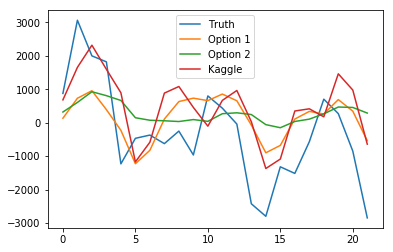

In [86]:
df_compare.plot()

In [83]:
df_compare = pd.concat([pd.DataFrame(y_test_sc),
                        pd.DataFrame(pred1),
                        pd.DataFrame(pred2),
                        pd.DataFrame(pred3_loop)], axis=1)
df_compare.columns = ['Truth (Scaled)', 'Option 1 (Scaled)', 'Option 2 (Scaled)', 'Kaggle (Scaled)']
df_compare

,Truth (Scaled),Option 1 (Scaled),Option 2 (Scaled),Kaggle (Scaled)
0,0.262795,0.176156,0.197825,0.240266
1,0.518579,0.245932,0.231294,0.353834
2,0.394017,0.272264,0.268695,0.431348
3,0.373218,0.206104,0.254963,0.347048
4,0.016593,0.133771,0.238203,0.265101
5,0.105866,0.017051,0.177818,0.023392
6,0.117200,0.063936,0.169073,0.092192
7,0.087287,0.173213,0.167173,0.263848
8,0.131105,0.234358,0.164562,0.286984
9,0.047675,0.246216,0.171368,0.213848


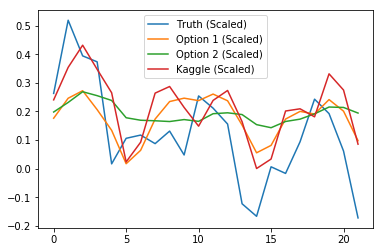

In [84]:
df_compare.plot()